# Проект спринта 8 "Принятие решений в бизнесе на основе данных"
## Проведение А/В теста для интернет магазина
### Смысловой контекст задачи - поиск путей повышения выручки интернет-магазина

#### Структура проектной работы.
#####  Цель: Проанализировать предложения, направленные на увеличение выручки интернет-магазина.
###### Задачи проекта:
1. выбрать предложение для тестирования
под предложениями по оптимизации подрузамеваются гипотезы.
выбор предложения проводится через приоритезацию гипотез.
2. проанализировать результаты А/В теста

* Анализируем метрики:
    * выручка
    * средний чек
    * конверсия
    * количество заказов на одного пользователя
    * стоимость заказа
3. сделать выводы и рекомендации

Средства работы билиотеки Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np
pd.set_option('display.max_colwidth', -1)

#  1.Определим перспективные направления исследований.
###### В процессе работы, возникает много предложений по улучшениям в работе компании. Любое улучшение должно конечной целью иметь рост выручки (прибыли).
###### Для этого к спискам предложенных улучшений применят специальные методы, которые позволяют оценить и выбрать приоритетные направления исследования измнений.


## Инструмент - Приоритизация гипотез.


Загрузим файл со списокм гипотез

In [2]:
hypothesis_list = pd.read_csv('/datasets/hypothesis.csv', sep=',')
hypothesis_list.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез.

In [3]:
hypothesis_list['ICE'] =(hypothesis_list['Impact'] * hypothesis_list['Confidence']) / hypothesis_list['Efforts']
hypothesis_list[['Hypothesis','ICE']].sort_values(by = 'ICE', ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


# Наиболее перспективны гипотезы:
## Метод исследования 1 (ICE - impact-confidence-ease)
1. "Запустить акцию, дающую скидку на товар в день рождения"
2. "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
3. "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

Применим фреймворк RICE для приоритизации гипотез

In [4]:
hypothesis_list['RICE'] =(hypothesis_list['Reach'] * hypothesis_list['Impact'] * hypothesis_list['Confidence'])\
/hypothesis_list['Efforts']

hypothesis_list[['Hypothesis','RICE']].sort_values(by = 'RICE', ascending = False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


# Наиболее перспективны гипотезы:
## Метод исследования 2 (RICE - reach-impact-confidence-ease)
1. "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
2. "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
3. "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"

Исследовав гипотезы по двум методам приоритизации, видим, что список перспективных гипотез отличается.

  - Обоснование различий:
    - Метод RICE учитывает сколько пользователей это измнение затронет- чем большее количество пользователей затрагивает измнение, тем гипотеза приоритетнее.

Очевидно, что форма подписки затронет большее количество пользователей, чем предложение о покупке в день рождения.
Так как не все пользователи обязательно покупают.

---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера

Верный и подробный вывод. Четкое ранжирование гипотез и указана причина изменения значимости гипотез в разных фреймворках.
    

Ты пишешь подробные и развернутые выводы и для большего удобства чтения их можно структурировать как 
    - маркированный 
    - список
или
    1. нумерованный 
    2. список

</div>

---


---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V2

Спасибо, что учла комментарии - теперь вывод более структурированный и удобен для чтения

</div>

---


---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V2
Увидела, что и этот комментарий отработан. Спасибо за исправления 
</div>

---


# 2 Изучим результат проведенного исследования
## Анализ A/B-теста

### Анализ A/B-теста шаг 1 получение и оценка данных и их оптимизация

выгрузим данные А/В теста, сформируем необходимые для анализа вспомогательные (объединенные) таблицы

 1. данные по визитам (заходам) на сайт интернет-магазина

In [5]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [6]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


преобразуем строки в формат дат

In [7]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
                                                                

проверим результат замены

In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [9]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


2. данные по заказам на сайте интернет-магазина

In [10]:
orders = pd.read_csv('/datasets/orders.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


преобразуем данные: строки в формат дат для столбца с датой заказа

In [12]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

Проверим результат замены

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [14]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


### Анализ A/B-теста шаг 2 оценка данных.
#### Оценка данных заключается в их исследовании на два параметра: полнота данных и отличие данных в тестируемых группах
##### Полнота данных исследуется для понимания, достаточно ли качественно проведен тест. 
По графикам проверяется стабильность метрик.Иными словами,проверяется,что размер выборки,определенынй до теста действительно оказался достаточным.
##### Отличие данных - непосредственно проверка результатов изменений - сработало предложенное измнение или нет, и как

##### План анализа 
построим графики:
1. кумулятивной выручки по группам. 
2. график кумулятивного среднего чека по группам.
3. график относительного изменения кумулятивного среднего чека группы B к группе A.
4. график кумулятивной конверсии по группам
5.  график относительного изменения кумулятивной конверсии группы B к группе A.


Технические особенности работы с данными: чтобы построить графики, нужно собрать кумулятивные данные.

In [15]:
#формируем массив уникальных пар значений дат и групп теста 
#этот код создает уникальные пары дата-группа теста
datesGroups = orders[['date','group']].drop_duplicates()

#зададим агрегированные данные по дням заказов

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]
                                     .agg({'date' : 'max',
                                           'group' : 'max', 
                                           'transactionId' : pd.Series.nunique, 
                                           'visitorId' : pd.Series.nunique,
                                           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])



#этот код для каждой пары из дата фрейма datesGroups берет все заказы за предыдущие выбранному дню
#(выбранный х-день включительно) 
#(orders[date] <= x[date])
# считает кол-во покупок и выручку 

# схожим образом формируем агрегированные кумулятивные данные по посетителям 



visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])].
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])



# теперь объединяем данные по закакзам и посетителям в один дата фрейм

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']




In [16]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Кумулятивные данные готовы.Строим графики

#### Анализ A/B-теста шаг 2.1. 
Построим графики кумулятивной выручки по группам теста.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


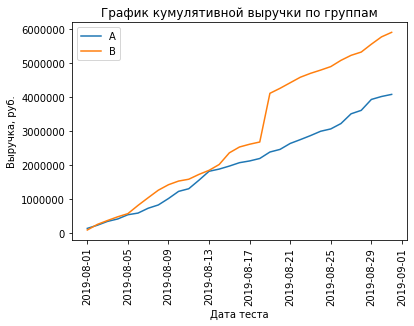

In [17]:
# выборка по группе А 
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# выборка по группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# график выручки A группы 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# график выручки A группы 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel("Дата теста")
plt.ylabel("Выручка, руб.")
plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.xticks(rotation = '90')
plt.show()

Выводы по визуальной оценке графика:
1. Выручка почти равномерно увеличивается в течение первых пяти дней теста.
2. Далее темп роста выручки по группе В начинает опережать темп роста по группе А.

 * Однако график выручки группы В имеет резкий всплеск в одной из точек резко. 
Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

#### Анализ A/B-теста шаг 2.2. 
построим график кумулятивного среднего чека по группам.

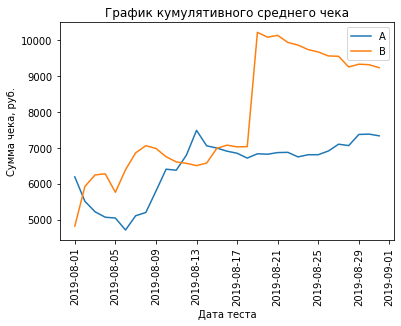

In [18]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel("Дата теста")
plt.ylabel("Сумма чека, руб.")
plt.title('График кумулятивного среднего чека')
plt.xticks(rotation = '90')
plt.show()

Визуальная оценка графика кумулятивного среднего чека показывает следующие тренды и тенденции.
 - Группа А аналогично графику кумулятивной выручки выглядит отстающей.
По ней видим неравномерную динамику: первые пять дней теста шел спад (снижение суммы чека), следующие 10 дней уверенный резкий рост, после которого было незначительное снижение в течение следующих 5 дней, и уже к концу теста плавное выравнивание.

 - Группа В на протяжении всего теста показывает рост.
С некоторой периодичностью (раз в 5-7 дней) происходил снижение.
И наблюдаем резкий рост на 17 день теста (скорее всего,это была/были выбросы - покупаки с очень большим чекаом/ками).


#### Анализ A/B-теста шаг 2.3. 
построим график относительного изменения кумулятивного среднего чека группы B к группе A.

No handles with labels found to put in legend.


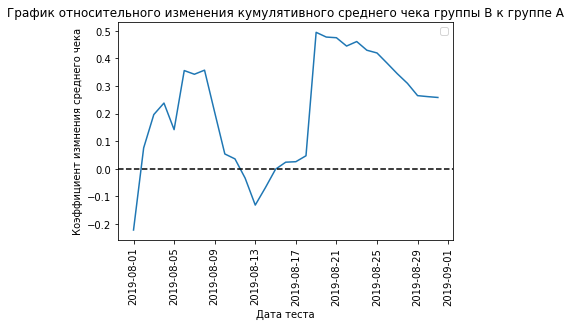

In [19]:
#сформируем единый датафрейм по двум группам - А и B
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#визуализируем отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

#ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.xlabel("Дата теста")
plt.ylabel("Коэффициент измнения среднего чека")
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation = '90')
plt.show()

Как минимум в трех точках график различия между групп сильно скачет, "проваливаясь" 13 августа 2019г., и имеет два всплеска,
21 августа 2019года  и 5 августа 2019года.


#### Анализ A/B-теста шаг 2.4.
строим график кумулятивной конверсии по группам

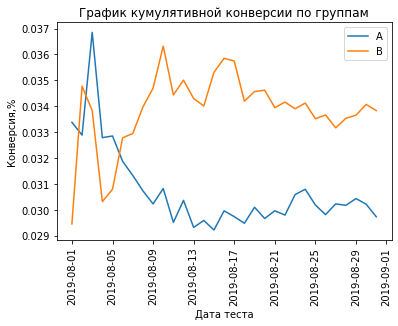

In [20]:
# расчитаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# фильтруем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# фильтруем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# визуализируем
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel("Дата теста")
plt.ylabel("Конверсия,%")
plt.title('График кумулятивной конверсии по группам')
plt.xticks(rotation = '90')
plt.show()


Визуальная оценка графика показывает:
1. первую неделю теста конверсия была примерно олинаковой;
2. со второй недели теста консверсия по группе В начинает превышать конверсию по группе А;
3. в целом, конверсия по группе В выше, чем конверсия по группе А

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V2

Резюме есть, все верно 
</div>

---

#### Анализ A/B-теста шаг 2.5.
строим график относительного изменения кумулятивной конверсии группы B к группе A.

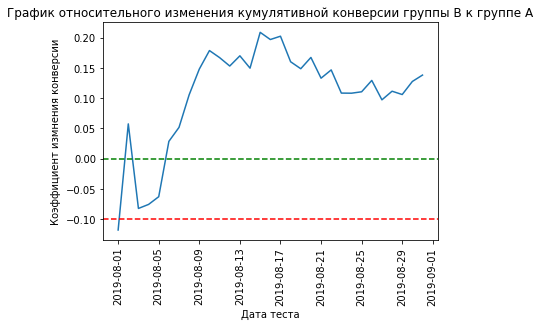

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")


plt.axhline(y=0, color='green', linestyle='--')
plt.axhline(y=-0.1, color='red', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xticks(rotation = '90')
plt.xlabel("Дата теста")
plt.ylabel("Коэффициент измнения конверсии")
plt.show()


Анализ графика:
1. В начале теста группа B несколько уступала группе A;
2. Затем стала опережать ее (соотношение более единицы, график выше зеленой линии); 
3. Потом её конверсия снова падала(все эти колебания произошли в течение первой недели теста);
4. Далее- только рост - сначала резкий (примерно втроая неделя теста), потом умеренный, далее - незначительное плавное снижение.
Далее опять плавный рост.



#### Анализ A/B-теста шаг 2.6. 
Построим точечный график количества заказов по пользователям. 

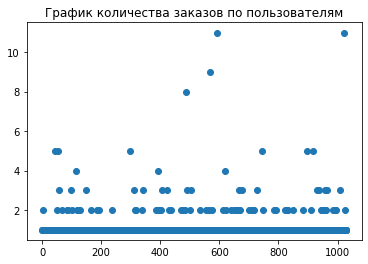

In [22]:
#считаем количество заказов по пользователям

ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1)\
                .groupby('visitorId', as_index=False).\
                agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']

ordersByUsers.sort_values(by='orders',ascending=False)

#строим точечный график количества заказов по пользователям.
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.show()


Визуальная оценка графика показывает, что есть достаточное количество пользователей,с 2-4 заказами и немного пользователей более, чем с 4 заказами - это точно аномалии. 
Однако, несяно, что делать с пользователями, вгранице 2-4 заказа.
Их точное количество (доля) не ясно — сделать вывод, считать их аномалиями или нет, только по графику, невозможно.

#### Анализ A/B-теста шаг 2.7.
Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. 
Выберем границу для определения аномальных пользователей.

In [23]:
#считаем 95-й и 99-й перцентили стоимости заказов
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

Не более 5% пользователей оформляли больше 2 заказа. 
И 10% пользователей заказывали более 1 раза.
Практика показывает, что в процессе анализ даннх отсеиваются до 5% наблюдений с крайнми значениями выбросова, чтобы такая отсечка данных не повлияла критичеки на точность исследования.
Можно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 
Будет логичным предположить, что их пользовательские алгоритмы отличаются от пользовательских алгоритмов стандартного пользователя, который, как правило, совершает не более двух заказов за короткий срок, если говорить не о магазинах регуряного спроса, например продукты питания.


---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Все верно, граница аномалий по количеству заказов определена

---

#### Анализ A/B-теста шаг 2.8.
Построим точечный график стоимостей заказов

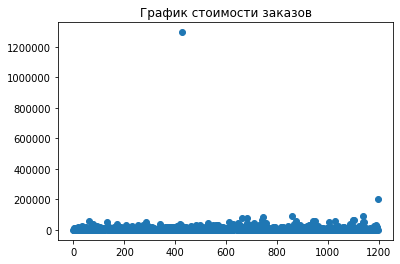

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов')
plt.show()

Визуальная оценка графика подтверждает наличие выбросов.
Видим один очень дорогой заказ свыше 1.2 миллионов.
По графику можно выбрать границу аномальных заказов свыше 200 000 рулей.

#### Анализ A/B-теста шаг 2.9.
Оценим границы аномальных заказов.Посчитайем 95-й и 99-й перцентили стоимости заказов.

In [25]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 000 рублей.
Отсеим данные на уровне 5%, приняв верхнюю границу чека на уровне 28 000 рублей.

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

С выбросами по сумме заказа тоже все верно 

---

#### Анализ A/B-теста шаг 2.10.
Оценим различия в конверсии по группам теста.

Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным.

Сформирем необходимые для этого дата фреймы

In [26]:
# считаем количество посетителей по группам по дням
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#считаем накопительное количество пользователей (куммулятивное) по дням
#то есть, в первый день это будет количество пользователей за один день, во второй за дв аи т.д.
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# делаем аналогичные упражнения для группы В
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# формируем срез заказов по группе А, группируем по дате и считаем агрегированные данные
# количество заказов и сумму выручки по дням заказов для группы А
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'visitorId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#считаем кумулятивные данные по заказам по группе А из агрегированных данных получаем данные накопительным итогом
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

# делаем аналогичные упражнения для группы В
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

#объединяем данные по двум группам
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

#создаем переменные ordersByUsersA и ordersByUsersB из дата фремй с заказамиб со столбцами 
#['visitorId', 'transactionId']. 
#в них для пользователей, которые заказывали хотя бы 1 раз, посчитаем число совершённых заказов.
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

#Считаем количество заказов для пользователей из группы А, для тех, у кого не было заказов, ставим 0
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleA.columns=['visitorId','orders']

#делаем аналогичное упражнение для пользователейгруппы B
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
sampleB.columns=['visitorId','orders']

Проверим гипотезу о наличии статистически значимых различий в конверсии группы А и В на сырых данных


In [27]:
#проверим гипотезу о наличии статистически значимых различий в конверсии группы А и В
#сформулируем нулевую гипотезу
#исходя из правил формулирования гипотез, которые говорят о том, что нулевая
#гипотеза всегда формулируется как А=В (различий нет),
#наша нулевая гипотеза следующая "между данными по конверсии группы А и В отсуствуют статисчтически значимые различия"
#обобщенно для всех метрик гипотеза звучит следующи образом 
#"отсутствует статистически значимая  разницы между данными по группе А и В"
#проведем стат тест
alpha = 0.05

print('p-value равно '"{0:.3f} ".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост конверсии группы В к группе А равен' ,"{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-value равно 0.008 
Относительный прирост конверсии группы В к группе А равен 0.138


In [28]:
if stats.mannwhitneyu(sampleA, sampleB)[1] < alpha:
    print('Отвергаем нулевую гипотезу, различия статистически значимы')
else:
     print('Не отвергаем нулевую гипотезу, в данных нет статистически значимых различий')

Отвергаем нулевую гипотезу, различия статистически значимы


Появилась статистическая значимость в данных по конверсии.
Прирост конверсии в группе В по отношению к группе А составил 13.8%

#### Анализ A/B-теста шаг 2.11.
Оценим различия по среднему чеку по группам теста.


In [29]:
print('p-value равно '"{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']
                                                          ['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы В к группе А равен ' "{0:.3f}"
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value равно 0.365
Относительный прирост среднего чека группы В к группе А равен 0.259


In [30]:
if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1] < alpha:
    print('Отвергаем нулевую гипотезу, различия статистически значимы')
else:
     print('Не отвергаем нулевую гипотезу, в данных нет статистически значимых различий')

Не отвергаем нулевую гипотезу, в данных нет статистически значимых различий


на текущий момент отсутсвуют статистически значимые различия в данных по группе А и В.
Так как статистически значимых различий нет, это означает, что разница в показателях в группе,скорее всего возникла случайно.
В частности,по причине всплесков, наличия в данных выборосов с очень большой суммой заказа.


#### Анализ A/B-теста шаг 2.12.
Оценим различия в конверсии по группам теста по очищенным данным.

In [31]:
#фильтруем данные, исходя из ранее определенных пороговых значений
#2 для количества заказов 
#28 000 для чека

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
len(abnormalUsers)

74

всего аномальных пользователя 74

In [32]:
#очистим от выборосов выборки по группе A и B
#датафреймы sampleA и sampleB

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].
                                                           isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA']
                                                          .sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].
                                                           isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB']
                                                          .sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

In [33]:
print('p-value равно '"{0:.3f} ".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы В к группе А по очищенным данным равен' ,"{0:.3f}".
        format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value равно 0.007 
Относительный прирост конверсии группы В к группе А по очищенным данным равен 0.173


In [34]:
if stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < alpha:
    print('Отвергаем нулевую гипотезу, в данных есть статистически значимые различия')
else:
     print('Не отвергаем нулевую гипотезу, в данных нет статистически значимых различий')

Отвергаем нулевую гипотезу, в данных есть статистически значимые различия


Видим, что по очищаенным данным, прирост по конверсии составляет 17 процентов.
Хороший результат.
В целом, если говорить о результате проверки гипотез по показателю конверсии.
И по очищенным данным, и по сырым данным подтверждается наличие статистически значимых различий в данных.
О чем это говорит, что различия в конверсии между группами А и В не возникли случайно и являются результатов теста.
Бизнес-вывод:"Введенное изменение повлечет за собой прирост конверсии"


---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V2
Здесь тоже все верно с выводом - молодец

</div>

---

#### Анализ A/B-теста шаг 2.13.
Оценим различия по среднему чеку по группам теста по очищенным данным.

In [35]:
print('p-value равно ' "{0:.3f}".format(stats.
        mannwhitneyu(orders[np.logical_and(orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('Относительный прирост среднего чека группы В к группе А по очищенным даннным равен ' "{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value равно 0.369
Относительный прирост среднего чека группы В к группе А по очищенным даннным равен -0.020


In [36]:
if stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1] < alpha:
    print('Отвергаем нулевую гипотезу, в данных есть статистически значимые различия')
else:
     print('Не отвергаем нулевую гипотезу, в данных нет статистически значимых различий')

Не отвергаем нулевую гипотезу, в данных нет статистически значимых различий


По очищеным данным мы видим незначительное снижение среднего чека в группе В относительно группы А.
Статистическая значимость также недостигнута.
В целом, если говорить о результате проверки гипотез по показателю величины среднего чека.
И по очищенным данным, и по сырым данным подтверждается отсутствие наличия статистически значимых различий в данных.
О чем это говорит:
1. что различия в величине среднего чека между группами А и В возникли случайно.
Что и подтвердил анализ данных с выявлением чека на сумму 1.5 млн руб.
2. что отсутсвует различия в сумме среднего чека, после очищенния данных от аномалий.

Бизнес-вывод:"Введенное изменение не повлечет за собой прирост суммы среднего чека"

Общие выводы по тесту:
Можно предположить, что тестировалась гипотеза 
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа".


Исходя из анализируемых метрик.
Что видим в резльтате анализа теста:
1. Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
Прирост в рамках 14-17%
2. По сырым и очищенным данным нет статистически значимого различия по среднему чеку между группами.
По очищенным данным видим незначиельное снижение среднего чека.
3. График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тренд к росту.

Общий вывод.
Мы видим увеличение конверсии, но, не видим роста среднего чека.
Тест можно завершить, признав результат удачным.


Общий вывод по проекту.

Анализ результатов теста за период август 2019г. имеем следующие данные.
1. предполагаемое изменение не влечет за собой изменение среднего чека.
Данные которые показал тест: снижение среднего чека на 2% в группе B относительно группы А.
2. предполагаемое изменение влечет за собой измненеи конверсии.
Данные которые показал тест:увеличение консервии на 17%.

В целом, рост конверсии потенциальный источник роста выручки.

Можно рекомендовать следующее:
разработать мероприятия для повышения среднего чека совместно с запуском изменения.
Как пример:
1. запуск маркетинговых акций;
2. накопительные программы;
3. кросс-селлинг.

Если исходить из предположения что тестировалось изменение 
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа".
Можно рекомендовать следующее:

1. Оптимизация и доработка блоков с рекомендациями
    - добавление кросс-селл-блоков — тем самым, стимулируя доппродажи;
    - предложение альтернативы;
    - макретингоые акции.
    
